In [13]:
# import reader.Read_otp
from reader import Read_otp

import numpy as np

import matplotlib as mpl
import matplotlib

# matplotlib.use('agg')
# matplotlib.use('TkAgg')
# matplotlib.use('qtagg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from math import *
# import pandas as pd

import logging

from scipy import interpolate
from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
from astropy.coordinates import SkyCoord, ICRS, Galactic

# import astropy.units as u
import astropy.units as units
import astropy.coordinates as coord
# from matplotlib.colors import LogNorm

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# #import matplotlib.ticker as mtick


import os

# %matplotlib widget
import seaborn as sns
import os, sys


# from astropy.io import ascii
# from astropy.coordinates import galactocentric_frame_defaults

import sklearn
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

from scipy import interpolate

import random
from scipy import integrate


gcolor = ["c", "blue", "g", "r", "orange", "green", "cyan"]


import ppxf as ppxf_package
from ppxf.ppxf import ppxf
import ppxf.ppxf_util as util
import ppxf.sps_util as lib
import sys, glob
from pathlib import Path

from ppxf.ppxf import ppxf, robust_sigma

from tqdm import tqdm

In [14]:
def TB_reindex(TB_now):
    TB_now = TB_now.reset_index()
    TB_now = TB_now.drop(columns='index')
    return TB_now

In [15]:
import numpy as np

def Data_Grouping(array_x, array_y, group_k):
    """
    Group data from two arrays and calculate median and standard deviation for each group.
    Ignores data points where either x or y contains NaN.
    
    Parameters:
    -----------
    array_x : array-like
        First input array
    array_y : array-like
        Second input array
    group_k : int
        Number of elements per group
        
    Returns:
    --------
    tuple of lists
        (median_x, median_y, std_x, std_y) for each group
    """
    # Input validation
    if len(array_x) != len(array_y):
        raise ValueError("Input arrays must have the same length")
    if group_k <= 0:
        raise ValueError("Group size must be a positive integer")
    
    # Convert inputs to numpy arrays for more efficient operations
    array_x = np.array(array_x, dtype=float)
    array_y = np.array(array_y, dtype=float)
    
    # Create a mask for valid (non-NaN) data points
    valid_mask = ~(np.isnan(array_x) | np.isnan(array_y))
    
    # Filter out rows with NaN values
    valid_x = array_x[valid_mask]
    valid_y = array_y[valid_mask]
    
    # Calculate number of groups
    total_len = len(valid_x)
    num_groups = (total_len + group_k - 1) // group_k  # Ceiling division
    
    # Initialize result lists
    median_x = []
    median_y = []
    std_x = []
    std_y = []
    
    # Process each group
    for i in range(num_groups):
        # Calculate start and end indices for current group
        start_idx = i * group_k
        end_idx = min(start_idx + group_k, total_len)
        
        # Extract current group data
        group_x = valid_x[start_idx:end_idx]
        group_y = valid_y[start_idx:end_idx]
        
        # Only calculate statistics if there are valid points in the group
        if len(group_x) > 0:
            median_x.append(np.median(group_x))
            median_y.append(np.median(group_y))
            
            # Use ddof=1 for sample standard deviation
            # If only 1 point is valid, use 0 for std dev or an alternative value
            std_x.append(np.std(group_x, ddof=1) if len(group_x) > 1 else 0)
            std_y.append(np.std(group_y, ddof=1) if len(group_y) > 1 else 0)
    
    return median_x, median_y, std_x, std_y

In [16]:
def Read_Galaxy(Galaxy_name):
    df_1 = Read_otp(Galaxy_name)
    df_2 = Read_otp(Galaxy_name, 'VNB')
    df_3 = Read_otp(Galaxy_name, 'RDB')

    return df_1, df_2, df_3

In [17]:
df_1, df_2, df_3= Read_Galaxy("VCC1588")

In [18]:
def PlotSNR(df_1,df_2,df_3):

    df_1_snr = df_1['signal_noise'].item()['snr'].reshape(-1)
    df_2_snr = df_2['snr'].reshape(-1)
    df_3_snr = df_3['snr'].reshape(-1)


    # fig, ax = plt(1, 1, facecolor='white', figsize=(6,4), dpi=300, tight_layout=True)
    plt.figsize=(6,4)
    gs1 = gridspec.GridSpec(1, 1)
    gs1.update(left=0.05, right=.95, bottom=0.05, top=0.95, hspace=0.05)
    ax1 = plt.subplot(gs1[0])

    ax1.hist(df_1_snr, color='tab:blue', range=(0,60), bins=12, alpha=.7)
    ax1.hist(df_2_snr, color='tab:orange', range=(0,60), bins=12, alpha=.7)
    ax1.hist(df_3_snr, color='tab:green',  range=(0,60), bins=12, alpha=.7)
    
    ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.tick_params(axis='both', which='both', labelsize='x-small', right=True, top=True, direction='in')

    # ax1.set_ylim(0,8)
    # ax1.set_xlim(,)
    # ax1.set_yscale('log')
    # ax1.set_xlabel(r'R', size=11)
    # ax1.set_ylabel(r'Hbeta', size=11)

    ax1.legend()

    # plt.savefig('./', format='pdf', bbox_inches='tight')

C:\Users\VacEn-WenJin\AppData\Local\Temp\ipykernel_26928\260820588.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


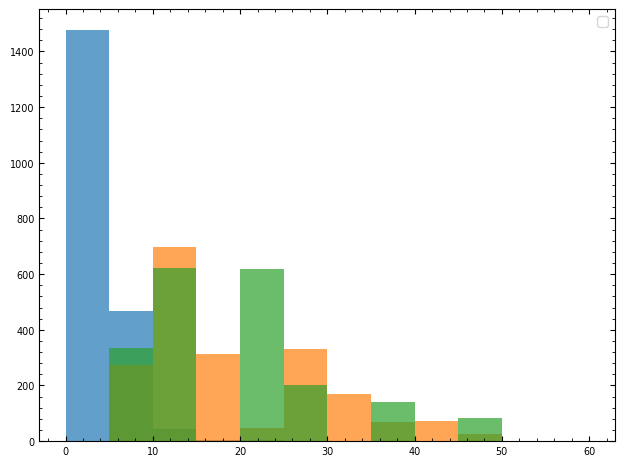

In [19]:
PlotSNR(df_1,df_2,df_3)

正在推断尺寸...
未能推断尺寸，使用默认值: 87x23
正在处理P2P数据...
成功添加P2P信噪比
成功添加P2P Hbeta指数
成功添加P2P Fe5015指数
成功添加P2P Mgb指数
成功添加P2P年龄
成功添加P2P金属丰度
成功添加P2P距离
正在处理VNB数据...
成功添加VNB信噪比 (二维数组)
成功添加VNB Hbeta指数
成功添加VNB Fe5015指数
成功添加VNB Mgb指数
成功添加VNB年龄
成功添加VNB金属丰度
成功添加VNB信噪比
正在处理RDB数据...
成功添加RDB信噪比 (二维数组)
成功添加RDB Hbeta指数
成功添加RDB Fe5015指数
成功添加RDB Mgb指数
已过滤信噪比低于 10.0 的 P2P 数据点
已过滤信噪比低于 10.0 的 VNB 数据点
已过滤信噪比低于 10.0 的 RDB 数据点
处理完成，生成数据框包含 21 列
坐标轴范围: X=(1, 5), Y=(1, 3)
绘制了 54 个P2P数据点
绘制了 1728 个VNB数据点
绘制了 1667 个RDB数据点
总计绘制了 3449 个数据点
绘制了 54 个P2P数据点
绘制了 1640 个VNB数据点
绘制了 1587 个RDB数据点
总计绘制了 3281 个数据点
绘制了 54 个P2P数据点
绘制了 1640 个VNB数据点
绘制了 1587 个RDB数据点
总计绘制了 3281 个数据点


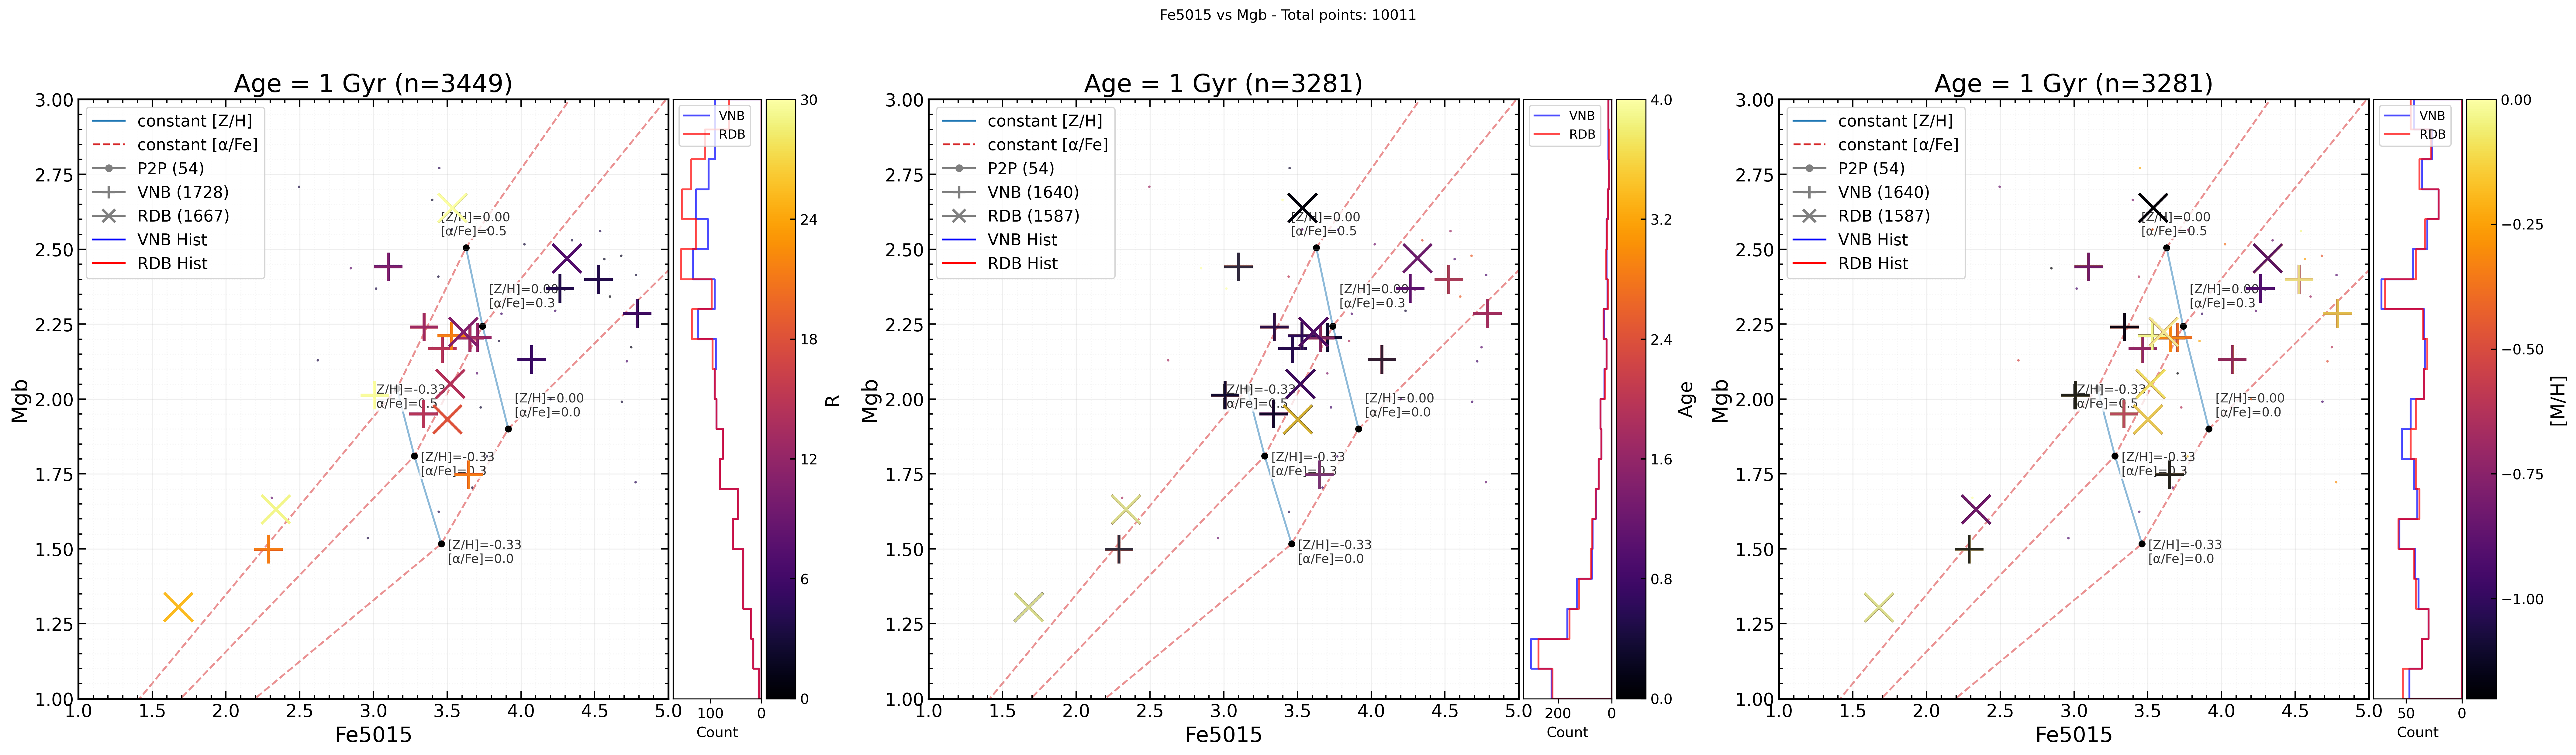

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import logging

# 设置日志
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def combine_galaxy_data(p2p_data, vnb_data, rdb_data, nx=None, ny=None, snr_threshold=0):
    """
    将P2P、VNB、RDB三种模式的数据合并为统一的pandas DataFrame格式
    
    参数
    ----------
    p2p_data : dict
        P2P分析结果
    vnb_data : dict
        VNB分析结果
    rdb_data : dict
        RDB分析结果
    nx, ny : int, optional
        图像的宽度和高度，如果为None将尝试从数据中推断
    snr_threshold : float, optional
        信噪比阈值，只保留高于此阈值的数据点
        
    返回
    ----------
    pandas.DataFrame
        合并后的数据框，每一行是一个像素，包含从三种模式中提取的数据
    """
    # 尝试从数据推断尺寸
    print("正在推断尺寸...")
    
    # 检查P2P数据中的signal_noise.snr
    if nx is None or ny is None:
        if 'signal_noise' in p2p_data and 'snr' in p2p_data['signal_noise']:
            signal_snr = p2p_data['signal_noise'].item()['snr']
            if isinstance(signal_snr, np.ndarray):
                if signal_snr.ndim == 2:
                    ny, nx = signal_snr.shape
                    print(f"从signal_noise.snr推断尺寸: {nx}x{ny}")
    
    # 如果仍未确定尺寸，使用默认值
    if nx is None or ny is None:
        nx, ny = 87, 23  # 从数据结构中看出的尺寸
        print(f"未能推断尺寸，使用默认值: {nx}x{ny}")
    
    # 创建像素索引
    pixels = np.arange(nx * ny)
    y_coords = pixels // nx
    x_coords = pixels % nx
    
    # 创建基础DataFrame
    df = pd.DataFrame({
        'pixel_id': pixels,
        'x': x_coords,
        'y': y_coords
    })
    
    # 处理P2P数据
    print("正在处理P2P数据...")
    
    # 添加P2P信噪比
    if 'signal_noise' in p2p_data and 'snr' in p2p_data['signal_noise'].item():
        snr = p2p_data['signal_noise'].item()['snr']
        if snr.ndim == 2:
            df['SNR_P2P'] = snr.flatten()
            print("成功添加P2P信噪比")
    
    # 提取P2P指数数据
    if 'indices' in p2p_data:
        indices = p2p_data['indices']
        
        # 提取Hbeta索引
        if 'Hbeta' in indices.item():
            hbeta = indices.item()['Hbeta']
            if hbeta.ndim == 2:
                df['Hbeta_SI'] = hbeta.flatten()
                print("成功添加P2P Hbeta指数")
            
        # 提取Fe5015索引
        if 'Fe5015' in indices.item():
            fe5015 = indices.item()['Fe5015']
            if fe5015.ndim == 2:
                df['Fe_5015_SI'] = fe5015.flatten()
                print("成功添加P2P Fe5015指数")
            
        # 提取Mgb索引
        if 'Mgb' in indices.item():
            mgb = indices.item()['Mgb']
            if mgb.ndim == 2:
                df['Mg_b_SI'] = mgb.flatten()
                print("成功添加P2P Mgb指数")
    
    # 提取年龄数据
    if 'stellar_population' in p2p_data:
        age = p2p_data['stellar_population'].item()['age']
        if age.ndim == 2:
            df['Age'] = age.flatten()
            print("成功添加P2P年龄")
    
    # 提取金属丰度数据
    if 'stellar_population' in p2p_data:
        metallicity = p2p_data['stellar_population'].item()['metallicity']
        if metallicity.ndim == 2:
            df['MOH'] = metallicity.flatten()
            print("成功添加P2P金属丰度")
    
    # 提取距离数据用于颜色编码
    if 'distance' in p2p_data:
        distance = p2p_data['distance'].item()['field']
        if distance.ndim == 2:
            df['R'] = distance.flatten()
            print("成功添加P2P距离")
            
    # 处理VNB数据
    print("正在处理VNB数据...")
    
    # 添加VNB信噪比
    if 'snr' in vnb_data:
        try:
            vnb_snr = vnb_data['snr']
            if isinstance(vnb_snr, np.ndarray) and vnb_snr.ndim == 2:
                df['SNR_VNB'] = vnb_snr.flatten()
                print("成功添加VNB信噪比 (二维数组)")
        except (AttributeError, ValueError) as e:
            # 可能是一个一维数组，需要通过binning映射
            if isinstance(vnb_data['snr'], np.ndarray) and vnb_data['snr'].ndim == 1:
                print("VNB SNR是一维数组，将通过bin映射")
    
    # 提取VNB指数数据
    if 'bin_indices' in vnb_data:
        try:
            bin_indices = vnb_data['bin_indices'].item()
            
            if 'pixel_indices' in bin_indices:
                pixel_indices = bin_indices['pixel_indices']
                
                # 提取Hbeta索引
                if 'Hbeta' in pixel_indices:
                    hbeta = pixel_indices['Hbeta']
                    if hbeta.ndim == 2:
                        df['Hbeta_SI_VNB'] = hbeta.flatten()
                        print("成功添加VNB Hbeta指数")
                    
                # 提取Fe5015索引
                if 'Fe5015' in pixel_indices:
                    fe5015 = pixel_indices['Fe5015']
                    if fe5015.ndim == 2:
                        df['Fe_5015_SI_VNB'] = fe5015.flatten()
                        print("成功添加VNB Fe5015指数")
                    
                # 提取Mgb索引
                if 'Mgb' in pixel_indices:
                    mgb = pixel_indices['Mgb']
                    if mgb.ndim == 2:
                        df['Mg_b_SI_VNB'] = mgb.flatten()
                        print("成功添加VNB Mgb指数")
        except (AttributeError, ValueError) as e:
            print(f"处理VNB bin_indices时出错: {e}")
            # 尝试不使用.item()方法
            if 'pixel_indices' in vnb_data['bin_indices']:
                pixel_indices = vnb_data['bin_indices']['pixel_indices']
                
                # 提取Hbeta索引
                if 'Hbeta' in pixel_indices:
                    hbeta = pixel_indices['Hbeta']
                    if hbeta.ndim == 2:
                        df['Hbeta_SI_VNB'] = hbeta.flatten()
                        print("成功添加VNB Hbeta指数 (不使用.item)")
                
                # 提取Fe5015索引
                if 'Fe5015' in pixel_indices:
                    fe5015 = pixel_indices['Fe5015']
                    if fe5015.ndim == 2:
                        df['Fe_5015_SI_VNB'] = fe5015.flatten()
                        print("成功添加VNB Fe5015指数 (不使用.item)")
                
                # 提取Mgb索引
                if 'Mgb' in pixel_indices:
                    mgb = pixel_indices['Mgb']
                    if mgb.ndim == 2:
                        df['Mg_b_SI_VNB'] = mgb.flatten()
                        print("成功添加VNB Mgb指数 (不使用.item)")
    
    # 提取VNB年龄和金属丰度
    if 'stellar_population' in vnb_data:
        try:
            stellar_pop = vnb_data['stellar_population'].item()
            
            # 获取bin_num以映射到像素
            if 'binning' in vnb_data and 'bin_num' in vnb_data['binning'].item():
                try:
                    bin_num = vnb_data['binning'].item()['bin_num']
                except (AttributeError, ValueError):
                    bin_num = vnb_data['binning']['bin_num']
                    
                # 确保bin_num是合适的形状
                if bin_num.ndim == 1:
                    # 创建映射数组
                    temp_bin_num = np.zeros(nx * ny)
                    
                    # 填充有效范围内的bin_num
                    valid_length = min(len(bin_num), nx * ny)
                    temp_bin_num[:valid_length] = bin_num[:valid_length]
                    df['vnb_bin_num'] = temp_bin_num
                    
                    # 现在映射年龄数据
                    if 'age' in stellar_pop:
                        ages = stellar_pop['age']
                        df['Age_VNB'] = np.nan
                        
                        # 为每个bin分配年龄值
                        for i, age_val in enumerate(ages):
                            if i < len(ages):
                                df.loc[df['vnb_bin_num'] == i, 'Age_VNB'] = age_val
                        
                        print("成功添加VNB年龄")
                    
                    # 映射金属丰度数据
                    if 'metallicity' in stellar_pop:
                        metallicities = stellar_pop['metallicity']
                        df['MOH_VNB'] = np.nan
                        
                        # 为每个bin分配金属丰度值
                        for i, metal_val in enumerate(metallicities):
                            if i < len(metallicities):
                                df.loc[df['vnb_bin_num'] == i, 'MOH_VNB'] = metal_val
                        
                        print("成功添加VNB金属丰度")
                        
                    # 映射信噪比数据（如果是一维数组）
                    if 'snr' in vnb_data:
                        snr_values = vnb_data['snr']
                        df['SNR_VNB'] = snr_values.flatten()
                        
                        print("成功添加VNB信噪比")
        except (AttributeError, ValueError) as e:
            print(f"处理VNB stellar_population时出错: {e}")
            # 尝试不使用.item()
            if 'binning' in vnb_data and 'bin_num' in vnb_data['binning']:
                bin_num = vnb_data['binning']['bin_num']
                
                # 确保bin_num是合适的形状
                if bin_num.ndim == 1:
                    # 创建映射数组
                    temp_bin_num = np.zeros(nx * ny)
                    
                    # 填充有效范围内的bin_num
                    valid_length = min(len(bin_num), nx * ny)
                    temp_bin_num[:valid_length] = bin_num[:valid_length]
                    df['vnb_bin_num'] = temp_bin_num
    
    # 处理RDB数据 (使用与VNB相同的处理方式)
    print("正在处理RDB数据...")
    
    # 添加RDB信噪比
    if 'snr' in rdb_data:
        try:
            rdb_snr = rdb_data['snr']
            if isinstance(rdb_snr, np.ndarray) and rdb_snr.ndim == 2:
                df['SNR_RDB'] = rdb_snr.flatten()
                print("成功添加RDB信噪比 (二维数组)")
        except (AttributeError, ValueError) as e:
            # 可能是一个一维数组，需要通过binning映射
            if isinstance(rdb_data['snr'], np.ndarray) and rdb_data['snr'].ndim == 1:
                print("RDB SNR是一维数组，将通过bin映射")
    
    # 提取RDB指数数据 - 使用与VNB相同的提取逻辑
    if 'bin_indices' in rdb_data:
        try:
            bin_indices = rdb_data['bin_indices'].item()
            
            if 'pixel_indices' in bin_indices:
                pixel_indices = bin_indices['pixel_indices']
                
                # 提取Hbeta索引
                if 'Hbeta' in pixel_indices:
                    hbeta = pixel_indices['Hbeta']
                    if hbeta.ndim == 2:
                        df['Hbeta_SI_RDB'] = hbeta.flatten()
                        print("成功添加RDB Hbeta指数")
                    
                # 提取Fe5015索引
                if 'Fe5015' in pixel_indices:
                    fe5015 = pixel_indices['Fe5015']
                    if fe5015.ndim == 2:
                        df['Fe_5015_SI_RDB'] = fe5015.flatten()
                        print("成功添加RDB Fe5015指数")
                    
                # 提取Mgb索引
                if 'Mgb' in pixel_indices:
                    mgb = pixel_indices['Mgb']
                    if mgb.ndim == 2:
                        df['Mg_b_SI_RDB'] = mgb.flatten()
                        print("成功添加RDB Mgb指数")
        except (AttributeError, ValueError) as e:
            print(f"处理RDB bin_indices时出错: {e}")
            # 尝试不使用.item()方法
            if 'pixel_indices' in rdb_data['bin_indices']:
                pixel_indices = rdb_data['bin_indices']['pixel_indices']
                
                # 提取Hbeta索引
                if 'Hbeta' in pixel_indices:
                    hbeta = pixel_indices['Hbeta']
                    if hbeta.ndim == 2:
                        df['Hbeta_SI_RDB'] = hbeta.flatten()
                        print("成功添加RDB Hbeta指数 (不使用.item)")
                
                # 提取Fe5015索引
                if 'Fe5015' in pixel_indices:
                    fe5015 = pixel_indices['Fe5015']
                    if fe5015.ndim == 2:
                        df['Fe_5015_SI_RDB'] = fe5015.flatten()
                        print("成功添加RDB Fe5015指数 (不使用.item)")
                
                # 提取Mgb索引
                if 'Mgb' in pixel_indices:
                    mgb = pixel_indices['Mgb']
                    if mgb.ndim == 2:
                        df['Mg_b_SI_RDB'] = mgb.flatten()
                        print("成功添加RDB Mgb指数 (不使用.item)")
    
    # 如果bin_indices不存在，但indices存在，尝试处理
    elif 'indices' in rdb_data:
        try:
            rdb_indices = rdb_data['indices'].item()
            
            # 如果有binning.bin_num，尝试映射到像素
            if 'binning' in rdb_data and 'bin_num' in rdb_data['binning']:
                bin_num_rdb = rdb_data['binning']['bin_num']
                
                # 提取Hbeta索引
                if 'Hbeta' in rdb_indices:
                    hbeta_rdb = rdb_indices['Hbeta']
                    if isinstance(hbeta_rdb, np.ndarray) and hbeta_rdb.ndim == 1:
                        # 创建结果数组
                        hbeta_2d = np.full(nx * ny, np.nan)
                        # 填充数据
                        for i, val in enumerate(hbeta_rdb):
                            if i < len(hbeta_rdb):
                                mask = bin_num_rdb == i
                                if isinstance(mask, np.ndarray) and np.any(mask):
                                    hbeta_2d[mask[:len(hbeta_2d)]] = val
                        df['Hbeta_SI_RDB'] = hbeta_2d
                        print("成功添加RDB Hbeta指数 (通过bin映射)")
                
                # 提取Fe5015索引
                if 'Fe5015' in rdb_indices:
                    fe5015_rdb = rdb_indices['Fe5015']
                    if isinstance(fe5015_rdb, np.ndarray) and fe5015_rdb.ndim == 1:
                        # 创建结果数组
                        fe5015_2d = np.full(nx * ny, np.nan)
                        # 填充数据
                        for i, val in enumerate(fe5015_rdb):
                            if i < len(fe5015_rdb):
                                mask = bin_num_rdb == i
                                if isinstance(mask, np.ndarray) and np.any(mask):
                                    fe5015_2d[mask[:len(fe5015_2d)]] = val
                        df['Fe_5015_SI_RDB'] = fe5015_2d
                        print("成功添加RDB Fe5015指数 (通过bin映射)")
                
                # 提取Mgb索引
                if 'Mgb' in rdb_indices:
                    mgb_rdb = rdb_indices['Mgb']
                    if isinstance(mgb_rdb, np.ndarray) and mgb_rdb.ndim == 1:
                        # 创建结果数组
                        mgb_2d = np.full(nx * ny, np.nan)
                        # 填充数据
                        for i, val in enumerate(mgb_rdb):
                            if i < len(mgb_rdb):
                                mask = bin_num_rdb == i
                                if isinstance(mask, np.ndarray) and np.any(mask):
                                    mgb_2d[mask[:len(mgb_2d)]] = val
                        df['Mg_b_SI_RDB'] = mgb_2d
                        print("成功添加RDB Mgb指数 (通过bin映射)")
        except (AttributeError, ValueError) as e:
            print(f"处理RDB indices时出错: {e}")
    
    # 提取RDB年龄和金属丰度
    if 'stellar_population' in rdb_data:
        try:
            stellar_pop_rdb = rdb_data['stellar_population'].item()
            
            # 获取bin_num以映射到像素
            if 'binning' in rdb_data and 'bin_num' in rdb_data['binning']:
                bin_num_rdb = rdb_data['binning']['bin_num']
                
                # 映射年龄数据
                if 'age' in stellar_pop_rdb and isinstance(stellar_pop_rdb['age'], np.ndarray):
                    ages_rdb = stellar_pop_rdb['age']
                    df['Age_RDB'] = np.nan
                    
                    # 为每个bin分配年龄值
                    for i, age_val in enumerate(ages_rdb):
                        if i < len(ages_rdb):
                            mask = bin_num_rdb == i
                            if isinstance(mask, np.ndarray) and np.any(mask):
                                df.loc[mask[:len(df)], 'Age_RDB'] = age_val
                    
                    print("成功添加RDB年龄")
                
                # 映射金属丰度数据
                if 'metallicity' in stellar_pop_rdb and isinstance(stellar_pop_rdb['metallicity'], np.ndarray):
                    metallicities_rdb = stellar_pop_rdb['metallicity']
                    df['MOH_RDB'] = np.nan
                    
                    # 为每个bin分配金属丰度值
                    for i, metal_val in enumerate(metallicities_rdb):
                        if i < len(metallicities_rdb):
                            mask = bin_num_rdb == i
                            if isinstance(mask, np.ndarray) and np.any(mask):
                                df.loc[mask[:len(df)], 'MOH_RDB'] = metal_val
                    
                    print("成功添加RDB金属丰度")
                    
        except (AttributeError, ValueError) as e:
            print(f"处理RDB stellar_population时出错: {e}")
    
    # 应用信噪比过滤 (如果指定了阈值)
    if snr_threshold > 0:
        # 对P2P数据应用SNR阈值
        if 'SNR_P2P' in df.columns:
            mask = df['SNR_P2P'] < snr_threshold
            cols_to_filter = [col for col in df.columns if (col.startswith('Hbeta_SI') or 
                               col.startswith('Fe_5015_SI') or 
                               col.startswith('Mg_b_SI')) and not col.endswith('_VNB') and not col.endswith('_RDB')]
            # 将低于阈值的行设为NaN
            for col in cols_to_filter:
                if col in df.columns:
                    df.loc[mask, col] = np.nan
            print(f"已过滤信噪比低于 {snr_threshold} 的 P2P 数据点")
            
        # 对VNB数据应用SNR阈值
        if 'SNR_VNB' in df.columns:
            mask = df['SNR_VNB'] < snr_threshold
            cols_to_filter = [col for col in df.columns if col.endswith('_VNB')]
            # 将低于阈值的行设为NaN
            for col in cols_to_filter:
                if col in df.columns:
                    df.loc[mask, col] = np.nan
            print(f"已过滤信噪比低于 {snr_threshold} 的 VNB 数据点")
            
        # 对RDB数据应用SNR阈值
        if 'SNR_RDB' in df.columns:
            mask = df['SNR_RDB'] < snr_threshold
            cols_to_filter = [col for col in df.columns if col.endswith('_RDB')]
            # 将低于阈值的行设为NaN
            for col in cols_to_filter:
                if col in df.columns:
                    df.loc[mask, col] = np.nan
            print(f"已过滤信噪比低于 {snr_threshold} 的 RDB 数据点")
    
    print(f"处理完成，生成数据框包含 {len(df.columns)} 列")
    return df


class SpectrumIndexPlotter:
    def __init__(self):
        """初始化绘图类"""
        self.model_data = None
        
    def calculate_axis_range(self, data_values, model_values=None, padding=0.1):
        """
        计算坐标轴范围，考虑数据点和模型网格
        
        参数:
        data_values: array-like, 数据点的值
        model_values: array-like, 模型网格的值（可选）
        padding: float, 范围扩展比例（默认0.1，即10%）
        
        返回:
        (min_val, max_val): tuple, 计算得到的范围
        """
        all_values = []
        
        if data_values is not None:
            all_values.extend(data_values)
        
        if model_values is not None:
            all_values.extend(model_values)
        
        if not all_values:
            return None
        
        min_val = min(all_values)
        max_val = max(all_values)
        
        range_size = max_val - min_val
        
        min_val = min_val - range_size * padding
        max_val = max_val + range_size * padding
        
        return (min_val, max_val)

    def plot_enhanced_multi_mode_panel(self, ax, model_data, x_index, y_index, x_range, y_range, ages,
                             data_df, mode_data_names, color_data, color_label, color_range,
                             annotate=True, show_errorbar=False,
                             hist_width="12%", cbar_width="4%",
                             hist_pad=0.02, cbar_pad=0.02,
                             # 样式参数
                             p2p_size=4,          # P2P数据点大小（小）
                             p2p_alpha=0.1,       # P2P数据点透明度（更透明）
                             vnb_size=30,         # VNB数据点大小
                             vnb_alpha=0.8,       # VNB数据点透明度
                             rdb_size=30,         # RDB数据点大小
                             rdb_alpha=0.8,       # RDB数据点透明度
                             text_size_scale=2.0, # 文字大小缩放因子
                             separate_histograms=True # 是否为VNB和RDB绘制单独的直方图
                             ):
        """
        增强版多模式绘制面板 - 支持独立区分三种模式
        修改后: VNB使用'+'，RDB使用'x', p2p使用 '.'
        """
        # 设置文字大小 - 减小标签大小
        label_fontsize = 12 * text_size_scale  # 减小标签大小
        title_fontsize = 14 * text_size_scale  # 减小标题大小
        tick_fontsize = 10 * text_size_scale   # 减小刻度标签大小
        legend_fontsize = 9 * text_size_scale  # 减小图例字号
        annot_fontsize = 7 * text_size_scale   # 减小注释字号
        
        # 处理Fe指数
        if x_index == 'Fe':
            model_data['Fe'] = (model_data['Fe5270'] + model_data['Fe5335']) / 2
        if y_index == 'Fe':
            model_data['Fe'] = (model_data['Fe5270'] + model_data['Fe5335']) / 2
        
        # 筛选特定年龄的数据
        age_data = model_data[model_data['Age'] == ages[0]].copy()
        
        # 获取独特的ZoH和AoFe值
        zoh_unique = sorted(age_data['ZoH'].unique())
        aofe_unique = sorted(age_data['AoFe'].unique())
        
        # 创建colorbar和直方图的位置
        divider = make_axes_locatable(ax)
        hist_ax = divider.append_axes("right", size=hist_width, pad=hist_pad)
        cax = divider.append_axes("right", size=cbar_width, pad=cbar_pad)
        
        # 准备颜色归一化范围
        if color_range:
            vmin, vmax = color_range
        else:
            # 过滤无效值后计算范围
            valid_mask = np.isfinite(color_data)
            valid_color = color_data[valid_mask]
            if len(valid_color) > 0:
                vmin, vmax = np.nanmin(valid_color), np.nanmax(valid_color)
            else:
                vmin, vmax = 0, 1
        
        # 保存每种模式所使用的点的数量和颜色数据
        mode_point_counts = {}
        vnb_colors = []
        rdb_colors = []
        point_count = 0
        
        # 绘制ZoH网格线 - 不受坐标范围限制 (设置zorder=1,让数据点在上层)
        for zoh in zoh_unique:
            zoh_data = age_data[age_data['ZoH'] == zoh]
            ax.plot(zoh_data[x_index], zoh_data[y_index], '-', 
                   color='tab:blue', alpha=0.5, linewidth=1.5, zorder=1)
        
        # 绘制AoFe网格线 - 不受坐标范围限制 (设置zorder=1,让数据点在上层)
        for aofe in aofe_unique:
            aofe_data = age_data[age_data['AoFe'] == aofe]
            ax.plot(aofe_data[x_index], aofe_data[y_index], '--', 
                   color='tab:red', alpha=0.5, linewidth=1.5, zorder=1)
        
        # 添加网格点和标注 - 标明所有网格点 (设置zorder=1,让数据点在上层)
        if annotate:
            for zoh in zoh_unique:
                for aofe in aofe_unique:
                    point_data = age_data[(age_data['ZoH'] == zoh) & (age_data['AoFe'] == aofe)]
                    if len(point_data) > 0:
                        x_val = point_data[x_index].values[0]
                        y_val = point_data[y_index].values[0]
                        
                        ax.scatter(x_val, y_val, color='black', s=20, zorder=1)
                        # 标注所有网格点
                        label = f'[Z/H]={zoh:.2f}\n[α/Fe]={aofe:.1f}'
                        # 调整文本框的位置以避免重叠
                        if aofe == 0.5 and zoh >= 0.0:
                            xytext = (-20, 10)  # 左上
                        elif aofe == 0.5:
                            xytext = (-20, -15)  # 左下
                        elif aofe == 0.0 and zoh >= 0.0:
                            xytext = (5, 10)    # 右上
                        elif aofe == 0.0:
                            xytext = (5, -15)   # 右下
                        elif aofe == 0.3 and zoh >= 0.0:
                            xytext = (5, 15)    # 右上
                        elif aofe == 0.3:
                            xytext = (5, -15)   # 右下
                        else:
                            xytext = (5, 5)     # 默认右上
                            
                        ax.annotate(label, (x_val, y_val), 
                                  xytext=xytext, textcoords='offset points',
                                  fontsize=annot_fontsize, alpha=0.8, zorder=1,
                                  bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, pad=1))
        
        # 绘制P2P模式数据 (使用点标记 '.', 小而适中透明度, zorder=10让其显示在上层)
        p2p_names = mode_data_names.get('p2p', {})
        if p2p_names and 'x' in p2p_names and 'y' in p2p_names:
            x_col, y_col = p2p_names['x'], p2p_names['y']
            
            # 检查列是否存在
            if x_col in data_df.columns and y_col in data_df.columns:
                # 筛选有效数据点
                valid_mask = np.isfinite(data_df[x_col]) & np.isfinite(data_df[y_col])
                
                # 确保颜色数据匹配
                if len(color_data) == len(data_df):
                    valid_mask = valid_mask & np.isfinite(color_data)
                    
                    if np.any(valid_mask):
                        # 这里使用.loc来避免链式赋值警告
                        valid_x = data_df.loc[valid_mask, x_col].values
                        valid_y = data_df.loc[valid_mask, y_col].values
                        valid_colors = color_data[valid_mask]
                        
                        # 记录有效点数量
                        p2p_count = np.sum(valid_mask)
                        mode_point_counts['P2P'] = p2p_count
                        point_count += p2p_count
                        
                        # 绘制散点图 - P2P使用点标记
                        scatter_p2p = ax.scatter(
                            valid_x, valid_y,
                            c=valid_colors,
                            vmin=vmin, vmax=vmax,
                            cmap='inferno', 
                            s=p2p_size, alpha=p2p_alpha,
                            marker='.',  # 点标记
                            edgecolors='none',
                            linewidths=0,
                            label='P2P',
                            zorder=10  # 在最上层
                        )
                        
                        print(f"绘制了 {p2p_count} 个P2P数据点")
        
        # 绘制VNB模式数据 (使用加号标记 '+', 中等大小, zorder=11让其显示在更上层)
        vnb_names = mode_data_names.get('vnb', {})
        if vnb_names and 'x' in vnb_names and 'y' in vnb_names:
            x_col, y_col = vnb_names['x'], vnb_names['y']
            
            # 检查列是否存在
            if x_col in data_df.columns and y_col in data_df.columns:
                # 筛选有效数据点
                valid_mask = np.isfinite(data_df[x_col]) & np.isfinite(data_df[y_col])
                
                # 确保颜色数据匹配
                if len(color_data) == len(data_df):
                    valid_mask = valid_mask & np.isfinite(color_data)
                    
                    if np.any(valid_mask):
                        # 使用.loc避免警告
                        valid_x = data_df.loc[valid_mask, x_col].values
                        valid_y = data_df.loc[valid_mask, y_col].values
                        valid_colors = color_data[valid_mask]
                        
                        # 记录有效点数量
                        vnb_count = np.sum(valid_mask)
                        mode_point_counts['VNB'] = vnb_count
                        point_count += vnb_count
                        
                        # 保存VNB颜色数据用于直方图
                        vnb_colors = valid_colors
                        
                        # 为VNB数据绘制加号标记
                        for i in range(len(valid_x)):
                            ax.plot(
                                valid_x[i], valid_y[i],
                                marker='+',  # 加号标记
                                markersize=np.sqrt(vnb_size) * 2.5,  # 标记大小
                                markeredgewidth=2.0,  # 标记线宽
                                markerfacecolor='none',
                                markeredgecolor=plt.cm.inferno((valid_colors[i] - vmin) / (vmax - vmin) if vmax > vmin else 0.5),
                                linestyle='None',  # 不绘制线
                                alpha=vnb_alpha,
                                zorder=11  # 显示在P2P之上
                            )
                        
                        # 为图例添加一个伪造的散点
                        ax.scatter(
                            [], [], 
                            c='gray',
                            marker='+',
                            s=vnb_size,
                            linewidths=2.0,
                            label='VNB'
                        )
                        
                        print(f"绘制了 {vnb_count} 个VNB数据点")
        
        # 绘制RDB模式数据 (使用叉号标记 'x', 中等大小, zorder=12让其显示在最上层)
        rdb_names = mode_data_names.get('rdb', {})
        if rdb_names and 'x' in rdb_names and 'y' in rdb_names:
            x_col, y_col = rdb_names['x'], rdb_names['y']
            
            # 检查列是否存在
            if x_col in data_df.columns and y_col in data_df.columns:
                # 筛选有效数据点
                valid_mask = np.isfinite(data_df[x_col]) & np.isfinite(data_df[y_col])
                
                # 确保颜色数据匹配
                if len(color_data) == len(data_df):
                    valid_mask = valid_mask & np.isfinite(color_data)
                    
                    if np.any(valid_mask):
                        # 使用.loc避免警告
                        valid_x = data_df.loc[valid_mask, x_col].values
                        valid_y = data_df.loc[valid_mask, y_col].values
                        valid_colors = color_data[valid_mask]
                        
                        # 记录有效点数量
                        rdb_count = np.sum(valid_mask)
                        mode_point_counts['RDB'] = rdb_count
                        point_count += rdb_count
                        
                        # 保存RDB颜色数据用于直方图
                        rdb_colors = valid_colors
                        
                        # 为RDB数据绘制叉号标记
                        for i in range(len(valid_x)):
                            ax.plot(
                                valid_x[i], valid_y[i],
                                marker='x',  # 叉号标记
                                markersize=np.sqrt(rdb_size) * 2.5,  # 标记大小
                                markeredgewidth=2.0,  # 标记线宽
                                markerfacecolor='none',
                                markeredgecolor=plt.cm.inferno((valid_colors[i] - vmin) / (vmax - vmin) if vmax > vmin else 0.5),
                                linestyle='None',  # 不绘制线
                                alpha=rdb_alpha,
                                zorder=12  # 显示在最上层
                            )
                        
                        # 为图例添加一个伪造的散点
                        ax.scatter(
                            [], [], 
                            c='gray',
                            marker='x',
                            s=rdb_size,
                            linewidths=2.0,
                            label='RDB'
                        )
                        
                        print(f"绘制了 {rdb_count} 个RDB数据点")
        
        # 绘制VNB和RDB专用的直方图
        if len(vnb_colors) > 0 or len(rdb_colors) > 0:
            print(f"总计绘制了 {point_count} 个数据点")
            
            # 创建一个临时的散点集用于colorbar
            scatter = ax.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap='inferno')
            
            # 设置直方图范围
            hist_range = color_range if color_range else (
                min(np.min(vnb_colors) if len(vnb_colors) > 0 else np.inf,
                    np.min(rdb_colors) if len(rdb_colors) > 0 else np.inf),
                max(np.max(vnb_colors) if len(vnb_colors) > 0 else -np.inf,
                    np.max(rdb_colors) if len(rdb_colors) > 0 else -np.inf)
            )
            
            if separate_histograms:
                # 为VNB和RDB绘制分离的直方图
                max_count = 0
                
                # 计算VNB直方图数据
                if len(vnb_colors) > 0:
                    vnb_counts, vnb_bin_edges = np.histogram(vnb_colors, bins=20, range=hist_range)
                    max_count = max(max_count, vnb_counts.max() if len(vnb_counts) > 0 else 0)
                    
                    # 创建VNB的外轮廓线条
                    vnb_outline = []
                    vnb_outline.append((0, vnb_bin_edges[0]))  # 左下角
                    for i in range(len(vnb_counts)):
                        vnb_outline.append((vnb_counts[i], vnb_bin_edges[i]))    # 左上角
                        vnb_outline.append((vnb_counts[i], vnb_bin_edges[i+1]))  # 右上角
                    vnb_outline.append((0, vnb_bin_edges[-1]))  # 右下角
                    vnb_outline.append((0, vnb_bin_edges[0]))   # 回到左下角
                    vnb_outline = np.array(vnb_outline)
                    
                    # 绘制VNB直方图外轮廓 - 使用蓝色
                    hist_ax.plot(vnb_outline[:,0], vnb_outline[:,1], 'b-', linewidth=1.5, alpha=0.7, label='VNB')
                    # 填充VNB直方图
                    # for i in range(len(vnb_counts)):
                    #     hist_ax.fill([0, vnb_counts[i], vnb_counts[i], 0],
                    #                [vnb_bin_edges[i], vnb_bin_edges[i], vnb_bin_edges[i+1], vnb_bin_edges[i+1]],
                    #                color='blue', alpha=0.3)
                
                # 计算RDB直方图数据
                if len(rdb_colors) > 0:
                    rdb_counts, rdb_bin_edges = np.histogram(rdb_colors, bins=20, range=hist_range)
                    max_count = max(max_count, rdb_counts.max() if len(rdb_counts) > 0 else 0)
                    
                    # 创建RDB的外轮廓线条
                    rdb_outline = []
                    rdb_outline.append((0, rdb_bin_edges[0]))  # 左下角
                    for i in range(len(rdb_counts)):
                        rdb_outline.append((rdb_counts[i], rdb_bin_edges[i]))    # 左上角
                        rdb_outline.append((rdb_counts[i], rdb_bin_edges[i+1]))  # 右上角
                    rdb_outline.append((0, rdb_bin_edges[-1]))  # 右下角
                    rdb_outline.append((0, rdb_bin_edges[0]))   # 回到左下角
                    rdb_outline = np.array(rdb_outline)
                    
                    # 绘制RDB直方图外轮廓 - 使用红色
                    hist_ax.plot(rdb_outline[:,0], rdb_outline[:,1], 'r-', linewidth=1.5, alpha=0.7, label='RDB')
                    # 填充RDB直方图
                    # for i in range(len(rdb_counts)):
                    #     hist_ax.fill([0, rdb_counts[i], rdb_counts[i], 0],
                    #                [rdb_bin_edges[i], rdb_bin_edges[i], rdb_bin_edges[i+1], rdb_bin_edges[i+1]],
                    #                color='red', alpha=0.3)
                
                # 添加直方图图例
                if len(vnb_colors) > 0 or len(rdb_colors) > 0:
                    hist_ax.legend(fontsize=tick_fontsize*0.7, loc='upper left')
            else:
                # 合并VNB和RDB数据，计算共同直方图
                combined_colors = []
                if len(vnb_colors) > 0:
                    combined_colors.extend(vnb_colors)
                if len(rdb_colors) > 0:
                    combined_colors.extend(rdb_colors)
                
                if len(combined_colors) > 0:
                    counts, bin_edges = np.histogram(combined_colors, bins=20, range=hist_range)
                    max_count = counts.max() if len(counts) > 0 else 1
                    
                    # 创建外轮廓线条的数据点
                    outline = []
                    outline.append((0, bin_edges[0]))  # 起始点（左下角）
                    for i in range(len(counts)):
                        outline.append((counts[i], bin_edges[i]))    # 左上角
                        outline.append((counts[i], bin_edges[i+1]))  # 右上角
                    outline.append((0, bin_edges[-1]))  # 回到起点（右下角）
                    outline.append((0, bin_edges[0]))   # 左下角
                    outline = np.array(outline)
                    
                    # 绘制直方图外轮廓
                    hist_ax.plot(outline[:,0], outline[:,1], 'k-', linewidth=1.5)
                    
                    # 填充直方图
                    # for i in range(len(counts)):
                    #     hist_ax.fill([0, counts[i], counts[i], 0],
                    #                [bin_edges[i], bin_edges[i], bin_edges[i+1], bin_edges[i+1]],
                    #                color='gray', alpha=0.5)
            
            # 设置直方图样式
            hist_ax.set_ylim(hist_range)
            if max_count > 1:
                hist_ax.set_xlim(max_count * 1.1, 0)  # 反转x轴，使直方图朝左
            else:
                hist_ax.set_xlim(1.1, 0)  # 至少给一点范围
                
            # 设置直方图刻度
            hist_ax.set_xlabel('Count', fontsize=tick_fontsize*0.8)  # 稍微减小标签大小
            hist_ax.tick_params(axis='both', which='both', labelsize=tick_fontsize*0.8)  # 减小刻度标签大小
            hist_ax.yaxis.set_visible(False)  # 隐藏y轴刻度
            
            # 添加colorbar
            cbar = plt.colorbar(scatter, cax=cax)
            if color_label:
                cbar.set_label(color_label, fontsize=label_fontsize*0.9)  # 稍微减小标签大小
            cbar.ax.tick_params(labelsize=tick_fontsize*0.8)  # 减小刻度标签大小
            cbar.ax.tick_params(which='both', direction='in', length=4, width=1.0)
            cbar.locator = plt.MaxNLocator(5)
            cbar.update_ticks()
        else:
            # 如果没有VNB或RDB数据，隐藏直方图和colorbar
            hist_ax.axis('off')
            cax.axis('off')
            print("警告：没有VNB或RDB数据点可绘制直方图")
        
        # 创建图例，包括网格线和数据点样式
        legend_elements = [
            Line2D([0], [0], color='tab:blue', linestyle='-', linewidth=1.5, label='constant [Z/H]'),
            Line2D([0], [0], color='tab:red', linestyle='--', linewidth=1.5, label='constant [α/Fe]')
        ]
        
        # 只添加有数据的模式到图例
        if 'P2P' in mode_point_counts and mode_point_counts['P2P'] > 0:
            legend_elements.append(Line2D([0], [0], marker='.', color='gray', markersize=10, 
                                        label=f'P2P ({mode_point_counts["P2P"]})'))
        if 'VNB' in mode_point_counts and mode_point_counts['VNB'] > 0:
            legend_elements.append(Line2D([0], [0], marker='+', color='gray', markersize=10, 
                                        markeredgewidth=2.0, label=f'VNB ({mode_point_counts["VNB"]})'))
        if 'RDB' in mode_point_counts and mode_point_counts['RDB'] > 0:
            legend_elements.append(Line2D([0], [0], marker='x', color='gray', markersize=10, 
                                        markeredgewidth=2.0, label=f'RDB ({mode_point_counts["RDB"]})'))
        
        # 添加直方图图例项目
        if len(vnb_colors) > 0:
            legend_elements.append(Line2D([0], [0], color='blue', linestyle='-', linewidth=1.5, label='VNB Hist'))
        if len(rdb_colors) > 0:
            legend_elements.append(Line2D([0], [0], color='red', linestyle='-', linewidth=1.5, label='RDB Hist'))
        
        ax.legend(handles=legend_elements, loc='upper left', fontsize=legend_fontsize)
        
        # 设置坐标轴样式
        ax.set_xlabel(x_index, fontsize=label_fontsize)
        ax.set_ylabel(y_index, fontsize=label_fontsize)
        ax.set_title(f'Age = {ages[0]} Gyr (n={point_count})', fontsize=title_fontsize)
        
        # 设置坐标轴范围 - 最后设置，确保先绘制完整网格
        ax.set_xlim(x_range)
        ax.set_ylim(y_range)
        
        # 设置刻度样式
        ax.tick_params(axis='both', which='both', labelsize=tick_fontsize, 
                      right=True, top=True, direction='in', width=1.0, length=6)
        ax.tick_params(which='minor', length=3)
        
        # 设置主次刻度
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        
        # 添加网格
        ax.grid(True, which='major', linestyle='-', alpha=0.2)
        ax.grid(True, which='minor', linestyle=':', alpha=0.1)
        
        # 调整边框样式
        for spine in ax.spines.values():
            spine.set_linewidth(1.5)
            
        # 返回点数和模式点数字典
        return point_count, mode_point_counts

    def plot_index_grid(self, data_file, x_index, y_index, x_range=None, y_range=None, 
                       ages=None, data_df=None, data_name=None, color_params=None,
                       annotate=True, show_errorbar=False, layout=None,
                       # 控制参数
                       base_size=7,          # 基础图形大小
                       height_scale=1.2,     # 高度缩放比例
                       width_ratios=1.4,     # 宽度比例（考虑右侧直方图和colorbar）
                       wspace=0.8,           # 子图之间的水平间距
                       hspace=0.3,           # 子图之间的垂直间距
                       dpi=300,              # 图形DPI
                       hist_width="12%",     # 直方图宽度比例
                       cbar_width="4%",      # colorbar宽度比例
                       hist_pad=0.02,        # 直方图间距
                       cbar_pad=0.02,        # colorbar间距
                       fig_scale=1.5,        # 画布整体缩放比例
                       # 多模式参数
                       mode_data_names=None, # 多模式数据名称
                       p2p_size=4,           # P2P数据点大小
                       p2p_alpha=0.7,        # P2P数据点透明度
                       vnb_size=30,          # VNB数据点大小
                       vnb_alpha=0.8,        # VNB数据点透明度
                       rdb_size=30,          # RDB数据点大小
                       rdb_alpha=0.8,        # RDB数据点透明度
                       text_size_scale=2.0,  # 文字大小缩放因子
                       separate_histograms=True # 是否为VNB和RDB绘制单独的直方图
                       ):
        """
        增强版索引网格图 - 支持多模式数据，分离的直方图，更大的文字
        """
        # 读取模型网格数据
        self.model_data = pd.read_csv(data_file)
        
        # 如果未指定年龄，使用默认值
        if ages is None:
            ages = [self.model_data['Age'].iloc[0]]
        
        # 获取坐标轴范围
        if x_range is None or y_range is None:
            # 从模型和所有数据模式收集数据点
            x_model_values = self.model_data[x_index].values
            y_model_values = self.model_data[y_index].values
            
            # 收集所有数据模式的值
            x_all_data = []
            y_all_data = []
            
            if mode_data_names:
                # 从P2P数据收集
                if 'p2p' in mode_data_names and 'x' in mode_data_names['p2p'] and 'y' in mode_data_names['p2p']:
                    x_col = mode_data_names['p2p']['x']
                    y_col = mode_data_names['p2p']['y']
                    if x_col in data_df.columns and y_col in data_df.columns:
                        x_all_data.extend(data_df[x_col].dropna().values)
                        y_all_data.extend(data_df[y_col].dropna().values)
                
                # 从VNB数据收集
                if 'vnb' in mode_data_names and 'x' in mode_data_names['vnb'] and 'y' in mode_data_names['vnb']:
                    x_col = mode_data_names['vnb']['x']
                    y_col = mode_data_names['vnb']['y']
                    if x_col in data_df.columns and y_col in data_df.columns:
                        x_all_data.extend(data_df[x_col].dropna().values)
                        y_all_data.extend(data_df[y_col].dropna().values)
                
                # 从RDB数据收集
                if 'rdb' in mode_data_names and 'x' in mode_data_names['rdb'] and 'y' in mode_data_names['rdb']:
                    x_col = mode_data_names['rdb']['x']
                    y_col = mode_data_names['rdb']['y']
                    if x_col in data_df.columns and y_col in data_df.columns:
                        x_all_data.extend(data_df[x_col].dropna().values)
                        y_all_data.extend(data_df[y_col].dropna().values)
            elif data_name:
                # 使用单一数据模式
                x_col = data_name['x']
                y_col = data_name['y']
                if x_col in data_df.columns and y_col in data_df.columns:
                    x_all_data.extend(data_df[x_col].dropna().values)
                    y_all_data.extend(data_df[y_col].dropna().values)
            
            # 计算轴范围
            if x_range is None:
                x_range = self.calculate_axis_range(x_all_data, x_model_values)
            if y_range is None:
                y_range = self.calculate_axis_range(y_all_data, y_model_values)
        
        # 确保有合理的范围值
        if x_range is None or y_range is None:
            logger.warning("无法自动确定坐标轴范围，使用默认值")
            x_range = x_range or (1.0, 5.0)  # 默认值
            y_range = y_range or (1.0, 3.0)  # 默认值
        
        print(f"坐标轴范围: X={x_range}, Y={y_range}")
        
        # 计算panel布局
        n_colors = len(color_params)
        if layout is None:
            n_rows = (n_colors + 1) // 2
            n_cols = min(2, n_colors)
        else:
            n_rows, n_cols = layout
            if n_rows * n_cols < n_colors:
                raise ValueError(f"Layout {layout} cannot accommodate {n_colors} plots")
        
        # 计算数据范围比例
        x_data_range = x_range[1] - x_range[0]
        y_data_range = y_range[1] - y_range[0]
        data_aspect_ratio = y_data_range / x_data_range
        
        # 计算基础单位大小，考虑数据范围比例
        fig_width = base_size * n_cols * width_ratios * fig_scale
        fig_height = base_size * n_rows * data_aspect_ratio * height_scale * fig_scale
        
        fig, axes = plt.subplots(n_rows, n_cols, 
                                figsize=(fig_width, fig_height),
                                dpi=dpi, facecolor='white')
        
        # 确保axes是二维数组
        if n_rows == 1 and n_cols == 1:
            axes = np.array([[axes]])
        elif n_rows == 1:
            axes = axes.reshape(1, -1)
        elif n_cols == 1:
            axes = axes.reshape(-1, 1)
        
        # 存储每个颜色的数据，用于计算标题上显示的数据量
        total_points = 0
        
        # 绘制每个panel
        for idx, color_param in enumerate(color_params):
            if layout is None:
                row = idx // 2
                col = idx % 2
            else:
                row = idx // n_cols
                col = idx % n_cols
            
            ax = axes[row, col]
            
            # 准备颜色数据
            color_col = color_param['column']
            
            # 检查颜色列是否存在
            if color_col in data_df.columns:
                color_data = data_df[color_col].values
            else:
                print(f"警告: 找不到颜色列 '{color_col}'，使用默认颜色")
                color_data = np.ones(len(data_df)) * 0.5
            
            # 根据是否提供了多模式数据调用对应的绘图函数
            if mode_data_names:
                point_count, _ = self.plot_enhanced_multi_mode_panel(
                    ax, self.model_data, x_index, y_index, 
                    x_range, y_range, ages,
                    data_df, mode_data_names, 
                    color_data, color_param['label'], color_param['range'],
                    annotate, show_errorbar,
                    hist_width=hist_width, cbar_width=cbar_width,
                    hist_pad=hist_pad, cbar_pad=cbar_pad,
                    p2p_size=p2p_size, p2p_alpha=p2p_alpha,
                    vnb_size=vnb_size, vnb_alpha=vnb_alpha,
                    rdb_size=rdb_size, rdb_alpha=rdb_alpha,
                    text_size_scale=text_size_scale,
                    separate_histograms=separate_histograms
                )
            else:
                # 使用traditional_single_panel绘制数据点
                # ... [这里应该调用原版的plot_single_panel，但现在使用多模式函数]
                point_count = 0  # 默认值
            
            total_points += point_count
        
        # 移除多余的subplot
        if n_colors < n_rows * n_cols:
            for idx in range(n_colors, n_rows * n_cols):
                if layout is None:
                    row = idx // 2
                    col = idx % 2
                else:
                    row = idx // n_cols
                    col = idx % n_cols
                fig.delaxes(axes[row, col])
        
        # 调整子图间距
        plt.subplots_adjust(wspace=wspace, hspace=hspace)
        
        # 添加总标题
        title_fontsize = 16 * text_size_scale/2  # 减小总标题大小
        fig.suptitle(f"{x_index} vs {y_index} - Total points: {total_points}", 
                   fontsize=title_fontsize, y=0.98)
        
        return fig


def Read_Galaxy(galaxy_name):
    """
    读取星系的三种分析数据
    
    参数:
    galaxy_name : str
        星系名称
        
    返回:
    tuple
        (p2p_data, vnb_data, rdb_data)
    """
    import numpy as np
    import logging
    import os
    logger = logging.getLogger(__name__)
    
    def load_results_from_npz(file_path):
        """Load results from npz file directly"""
        try:
            data = np.load(file_path, allow_pickle=True)

            # Check if data contains a 'results' key which holds the actual data
            if "results" in data:
                return data["results"]

            # Otherwise, get the first array
            keys = list(data.keys())
            if keys:
                first_key = keys[0]
                if isinstance(data[first_key], np.ndarray) and data[
                    first_key
                ].dtype == np.dtype("O"):
                    return data[first_key]

            # As a fallback, create a dict from all keys
            return {k: data[k] for k in data}
        except Exception as e:
            logger.error(f"Error loading file {file_path}: {e}")
            # 返回一个模拟的空数组
            return np.array({})

    def Read_otp(galaxy_name, mode_name="P2P"):
        """Read output file for a specific mode"""
        file_path = (
            "./output/"
            + galaxy_name
            + "/"
            + galaxy_name
            + "_stack/Data/"
            + galaxy_name
            + "_stack_"
            + mode_name
            + "_results.npz"
        )
        try:
            if os.path.exists(file_path):
                df = load_results_from_npz(file_path)
                return df
            else:
                logger.warning(f"文件不存在: {file_path}")
                return np.array({})
        except Exception as e:
            logger.error(f"Error reading {mode_name} data for {galaxy_name}: {e}")
            return np.array({})
    
    # 读取原始数据
    try:
        df_1 = Read_otp(galaxy_name)
        df_2 = Read_otp(galaxy_name, 'VNB')
        df_3 = Read_otp(galaxy_name, 'RDB')
        return df_1, df_2, df_3
    except Exception as e:
        logger.error(f"Error reading galaxy data: {e}")
        
        # 返回示例数据用于调试
        # P2P数据
        p2p_data = np.array({
            'analysis_type': 'P2P',
            'stellar_kinematics': {'velocity_field': np.zeros((23, 87)), 'dispersion_field': np.zeros((23, 87))},
            'global_kinematics': {'pa': 102.0, 'vsys': 19.17},
            'distance': {'field': np.ones((23, 87))*30, 'pixelsize_x': 0.58, 'pixelsize_y': 2.64},
            'emission': {'velocity_field': np.zeros((23, 87)), 'dispersion_field': np.zeros((23, 87))},
            'signal_noise': {'signal': np.ones((23, 87))*10, 'noise': np.ones((23, 87))*5, 'snr': np.ones((23, 87))*2},
            'stellar_population': {'log_age': np.zeros((23, 87)), 'age': np.ones((23, 87))*2, 'metallicity': np.ones((23, 87))*-0.5},
            'indices': {'Hbeta': np.ones((23, 87))*3, 'Fe5015': np.ones((23, 87))*5, 'Mgb': np.ones((23, 87))*2}
        })
        
        # VNB数据
        vnb_data = np.array({
            'analysis_type': 'VNB',
            'binning': {'bin_num': np.zeros(2001), 'bin_x': np.zeros(11), 'bin_y': np.zeros(11), 
                        'snr': np.ones(11)*30, 'n_pixels': np.ones(11)*100},
            'stellar_kinematics': {'velocity': np.zeros((23, 87)), 'dispersion': np.zeros((23, 87))},
            'distance': {'bin_distances': np.ones(11)*30, 'pixelsize_x': 0.58, 'pixelsize_y': 2.64},
            'stellar_population': {'log_age': np.zeros(11), 'age': np.ones(11)*2, 'metallicity': np.ones(11)*-0.5},
            'emission': {},
            'signal': np.ones((23, 87))*15,
            'noise': np.ones((23, 87)),
            'snr': np.ones((23, 87))*15,
            'bin_indices': {'bin_indices': {'Hbeta': np.ones(11)*3, 'Fe5015': np.ones(11)*5, 'Mgb': np.ones(11)*2},
                            'pixel_indices': {'Hbeta': np.ones((23, 87))*3, 'Fe5015': np.ones((23, 87))*5, 'Mgb': np.ones((23, 87))*2}}
        })
        
        # RDB数据
        rdb_data = np.array({
            'analysis_type': 'RDB',
            'binning': {'bin_num': np.zeros(2001), 'n_rings': 10, 'bin_radii': np.ones(10)*5},
            'stellar_kinematics': {'velocity': np.zeros(10), 'dispersion': np.zeros(10)},
            'distance': {'bin_distances': np.ones(10)*30, 'pixelsize_x': 0.58, 'pixelsize_y': 2.64},
            'stellar_population': {'log_age': np.zeros(10), 'age': np.ones(10)*2, 'metallicity': np.ones(10)*-0.5},
            'global_kinematics': {'pa': 102.0, 'vsys': 19.17},
            'indices': {'Hbeta': np.ones(10)*3, 'Fe5015': np.ones(10)*5, 'Mgb': np.ones(10)*2}
        })
        
        return p2p_data, vnb_data, rdb_data


def main():
    """主程序入口"""
    # 读取星系数据
    p2p_data, vnb_data, rdb_data = Read_Galaxy("VCC1588")
    
    # 设置信噪比阈值，过滤低信噪比数据
    snr_threshold = 10.0
    
    # 合并数据为DataFrame，应用信噪比过滤
    galaxy_df = combine_galaxy_data(p2p_data, vnb_data, rdb_data, snr_threshold=snr_threshold)
    
    # 创建绘图对象
    plotter = SpectrumIndexPlotter()
    
    # 设置参数 - 使用您提供的原始参数
    data_file = './TMB03/TMB03.csv'  # 请替换为实际路径
    x_range = (1, 5)
    y_range = (1, 3)
    ages = [1]
    
    # 准备数据列名映射 - 使用原始格式
    data_name = {
        'x': 'Fe_5015_SI',  # 观测数据中的X轴列名
        'y': 'Mg_b_SI',     # 观测数据中的Y轴列名
    }
    
    # 准备多模式数据列名映射
    mode_data_names = {
        'p2p': {
            'x': 'Fe_5015_SI',  # P2P模式的X轴列名
            'y': 'Mg_b_SI',     # P2P模式的Y轴列名
        },
        'vnb': {
            'x': 'Fe_5015_SI_VNB',  # VNB模式的X轴列名
            'y': 'Mg_b_SI_VNB',     # VNB模式的Y轴列名
        },
        'rdb': {
            'x': 'Fe_5015_SI_RDB',  # RDB模式的X轴列名
            'y': 'Mg_b_SI_RDB',     # RDB模式的Y轴列名
        }
    }
    
    # 设置颜色参数
    color_params = [
        {'column': 'R', 'label': 'R', 'range': (0, 30)},
        {'column': 'Age', 'label': 'Age', 'range': (0, 4)},
        {'column': 'MOH', 'label': r'[M/H]', 'range': (-1.2, 0)},
    ]
    
    # 使用增强版绘图函数，进一步调整排版，减小标签大小
    fig = plotter.plot_index_grid(
        data_file=data_file,
        x_index='Fe5015',
        y_index='Mgb',
        x_range=x_range,
        y_range=y_range,
        ages=ages,
        data_df=galaxy_df,
        data_name=data_name,
        color_params=color_params,
        show_errorbar=False,
        layout=(1,3),
        
        base_size=7,           # 基础大小
        height_scale=1.6,      # 高度缩放
        width_ratios=0.9,      # 宽度比例
        wspace=0.25,           # 水平间距
        hspace=0.3,            # 垂直间距
        dpi=300,
        hist_width="15%",      # 直方图宽度
        cbar_width="5%",       # colorbar宽度
        hist_pad=0.05,         # 间距
        cbar_pad=0.05,         # 间距
        fig_scale=1.5,         # 整体缩放
        
        # 多模式参数 - 修改标记类型和大小
        mode_data_names=mode_data_names,
        p2p_size=15,           # P2P数据点使用'.'
        p2p_alpha=0.7,         # P2P数据点透明度
        vnb_size=80,           # VNB数据点使用'+'
        vnb_alpha=0.85,        
        rdb_size=80,           # RDB数据点使用'x'
        rdb_alpha=0.85,
        text_size_scale=1.4,   # 减小文字大小
        separate_histograms=True  # 使用分离的直方图
    )
    
    # 调整整体布局，解决排版问题
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 避免标题与子图重叠
    
    # 保存图形
    fig.savefig(f'VCC1588_spectral_indices_comparison_enhanced.png', dpi=300, bbox_inches='tight')
    
    # 显示图形
    plt.show()


if __name__ == "__main__":
    main()

In [21]:
# D1 = DF_CBer([df_1['indices'].item()['Hbeta'],df_1['distance'].item()['field']], ['Hbeta','r'])
# D2 = DF_CBer([df_2['indices'].item()['bin_indices']['Hbeta'],df_2['distance'].item()['bin_distances']], ['Hbeta','r'])
# D3 = DF_CBer([df_3['indices'].item()['Hbeta'],df_3['distance'].item()['bin_distances']], ['Hbeta','r'])

In [22]:
# plt.plot(Test['r'], Test['Hbeta'], '.')

In [23]:
# # fig, ax = plt(1, 1, facecolor='white', figsize=(6,4), dpi=300, tight_layout=True)
# plt.figsize=(6,4)
# gs1 = gridspec.GridSpec(1, 1)
# gs1.update(left=0.05, right=.95, bottom=0.05, top=0.95, hspace=0.05)
# ax1 = plt.subplot(gs1[0])

# ax1.plot(D1['r'], D1['Hbeta'], 'o', c='tab:gray', ms=2, mew=1, alpha=.3, label='P2P Solution', zorder=0)
# ax1.plot(D2['r'], D2['Hbeta'], '+', c='tab:red', ms=7, mew=2, alpha=.7, label='VNB Solution')
# # ax1.plot(D3['r'], D3['Hbeta'], 'x', c='tab:green', ms=7, mew=2, alpha=.7, label='RDB Solution')

# Galaxy_P2P_GP = Data_Grouping(array_x=np.array(D1.sort_values(by=['r'])['r']), array_y=np.array(D1.sort_values(by=['r'])['Hbeta']), group_k=70)
# Galaxy_VNB_GP = Data_Grouping(array_x=np.array(D2.sort_values(by=['r'])['r']), array_y=np.array(D2.sort_values(by=['r'])['Hbeta']), group_k=3)
# # Galaxy_RDB_GP = Data_Grouping(array_x=np.array(D3.sort_values(by=['r'])['r']), array_y=np.array(D3.sort_values(by=['r'])['Hbeta']), group_k=3)

# ax1.errorbar(Galaxy_P2P_GP[0], Galaxy_P2P_GP[1], yerr=Galaxy_P2P_GP[3],color='tab:gray',fmt='^-',ms=3,elinewidth=1.2,capsize=1.7,capthick=1.2,alpha=.7, zorder=1)
# ax1.errorbar(Galaxy_VNB_GP[0], Galaxy_VNB_GP[1], yerr=Galaxy_VNB_GP[3],color='tab:red',fmt='^-',ms=3,elinewidth=1.2,capsize=1.7,capthick=1.2,alpha=.7)
# # ax1.errorbar(Galaxy_RDB_GP[0], Galaxy_RDB_GP[1], yerr=Galaxy_RDB_GP[3],color='tab:green',fmt='^-',ms=3,elinewidth=1.2,capsize=1.7,capthick=1.2,alpha=.7, zorder=1)

# ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
# ax1.tick_params(axis='both', which='both', labelsize='x-small', right=True, top=True, direction='in')

# ax1.set_ylim(0,8)
# # ax1.set_xlim(,)
# # ax1.set_yscale('log')
# ax1.set_xlabel(r'R', size=11)
# ax1.set_ylabel(r'H beta', size=11)

# ax1.legend()

# # plt.savefig('./', format='pdf', bbox_inches='tight')

2025-05-04 03:44:39,149 - __main__ - INFO - 读取星系 VCC1588 的数据...
2025-05-04 03:44:39,297 - __main__ - INFO - 提取光谱指数数据...
2025-05-04 03:44:39,297 - __main__ - INFO - 正在处理P2P数据...
2025-05-04 03:44:39,297 - __main__ - INFO - 成功提取P2P半径
2025-05-04 03:44:39,297 - __main__ - INFO - 成功提取P2P信噪比
2025-05-04 03:44:39,306 - __main__ - INFO - 成功提取P2P Hbeta指数
2025-05-04 03:44:39,306 - __main__ - INFO - 成功提取P2P Fe5015指数
2025-05-04 03:44:39,306 - __main__ - INFO - 成功提取P2P Mgb指数
2025-05-04 03:44:39,307 - __main__ - INFO - 已过滤P2P Hbeta中信噪比低于10.0的数据
2025-05-04 03:44:39,307 - __main__ - INFO - 已过滤P2P Fe5015中信噪比低于10.0的数据
2025-05-04 03:44:39,308 - __main__ - INFO - 已过滤P2P Mgb中信噪比低于10.0的数据
2025-05-04 03:44:39,308 - __main__ - INFO - 正在处理VNB数据...
2025-05-04 03:44:39,308 - __main__ - INFO - 成功提取VNB半径
2025-05-04 03:44:39,308 - __main__ - INFO - 成功提取VNB信噪比
2025-05-04 03:44:39,308 - __main__ - INFO - 成功提取VNB Hbeta指数
2025-05-04 03:44:39,308 - __main__ - INFO - 成功提取VNB Fe5015指数
2025-05-04 03:44:39,308 - __main__ - IN

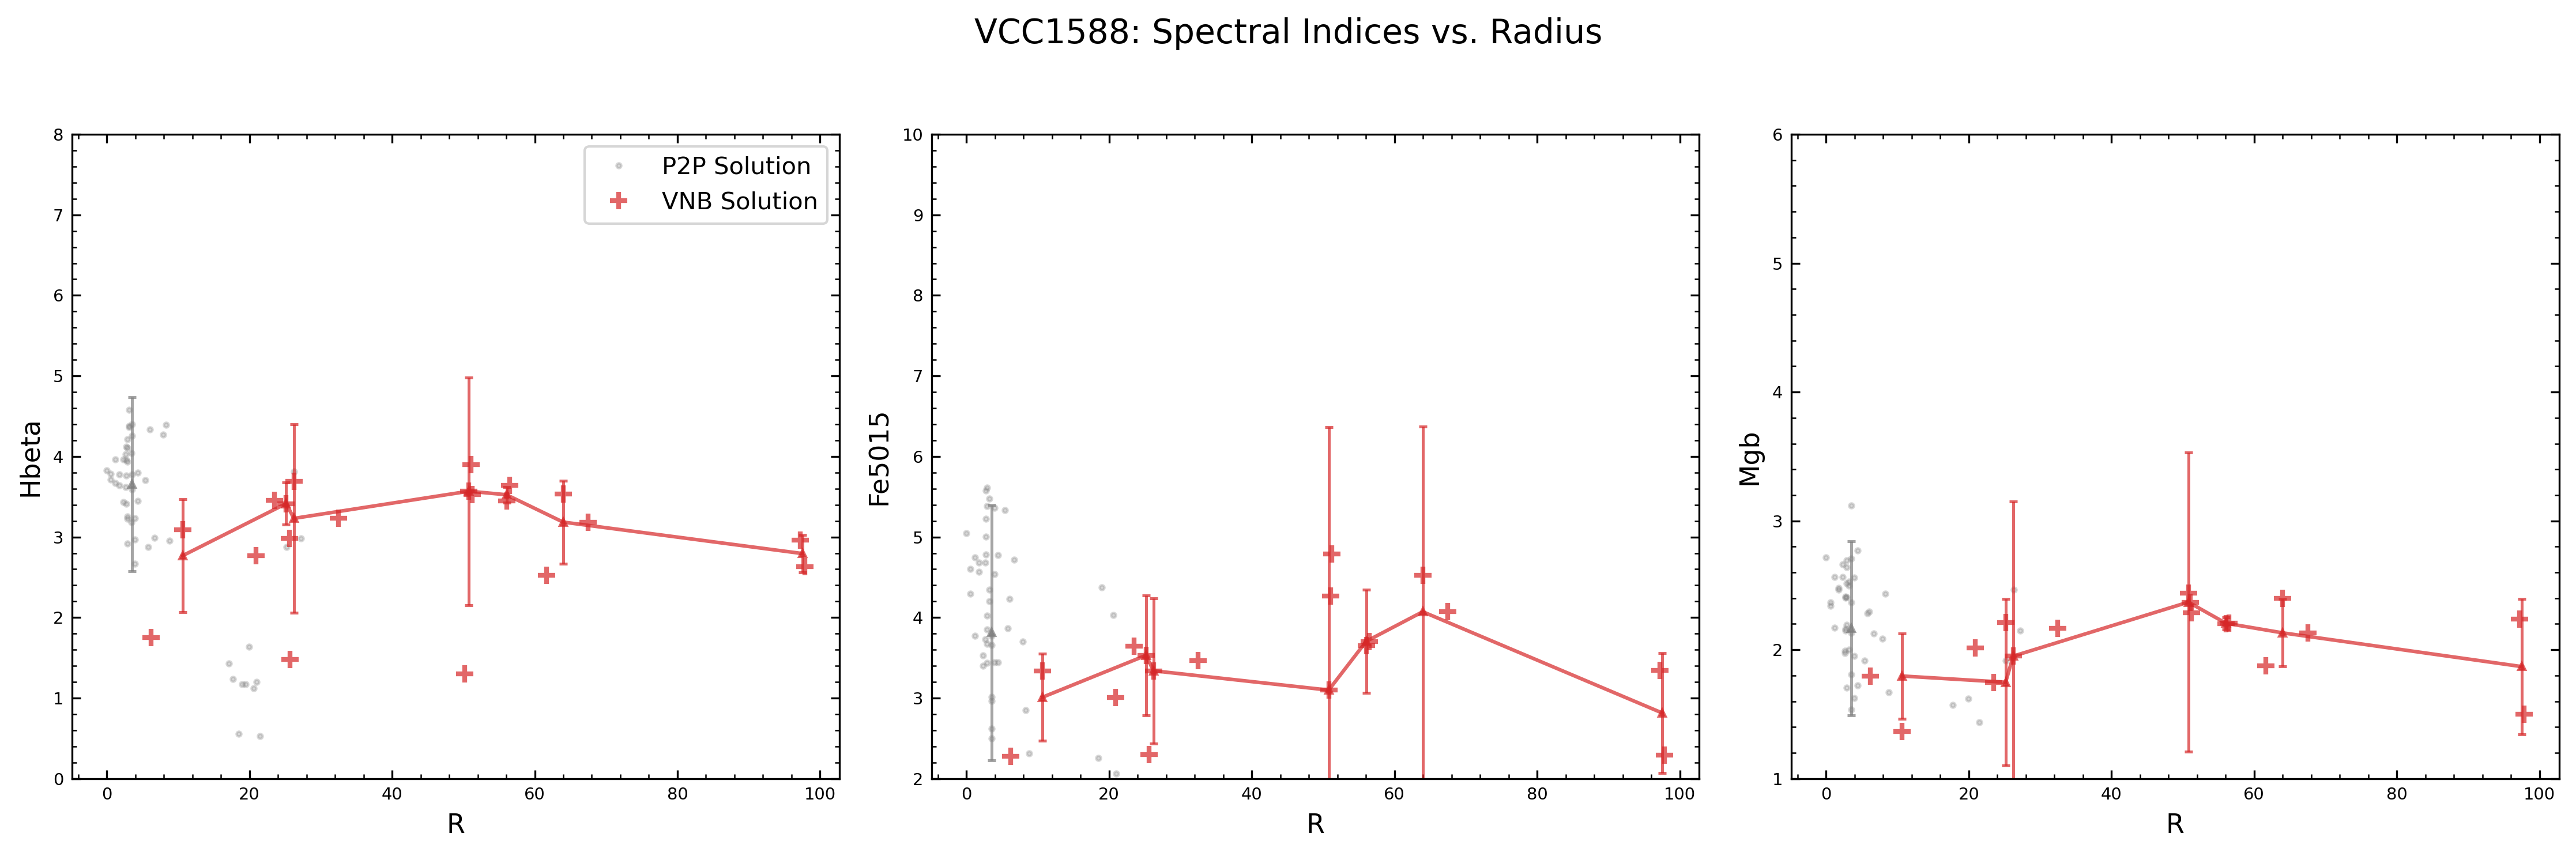

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import logging
import os

# 设置日志
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def load_results_from_npz(file_path):
    """Load results from npz file directly"""
    try:
        data = np.load(file_path, allow_pickle=True)

        # Check if data contains a 'results' key which holds the actual data
        if "results" in data:
            return data["results"]

        # Otherwise, get the first array
        keys = list(data.keys())
        if keys:
            first_key = keys[0]
            if isinstance(data[first_key], np.ndarray) and data[
                first_key
            ].dtype == np.dtype("O"):
                return data[first_key]

        # As a fallback, create a dict from all keys
        return {k: data[k] for k in data}
    except Exception as e:
        logger.error(f"Error loading file {file_path}: {e}")
        # 返回一个模拟的空数组
        return np.array({})

def Read_Galaxy(galaxy_name):
    """
    读取星系的三种分析数据
    
    参数:
    galaxy_name : str
        星系名称
        
    返回:
    tuple
        (p2p_data, vnb_data, rdb_data)
    """
    def Read_otp(galaxy_name, mode_name="P2P"):
        """Read output file for a specific mode"""
        file_path = (
            "./output/"
            + galaxy_name
            + "/"
            + galaxy_name
            + "_stack/Data/"
            + galaxy_name
            + "_stack_"
            + mode_name
            + "_results.npz"
        )
        try:
            if os.path.exists(file_path):
                df = load_results_from_npz(file_path)
                return df
            else:
                logger.warning(f"文件不存在: {file_path}")
                return np.array({})
        except Exception as e:
            logger.error(f"Error reading {mode_name} data for {galaxy_name}: {e}")
            return np.array({})
    
    # 读取原始数据
    try:
        df_1 = Read_otp(galaxy_name)
        df_2 = Read_otp(galaxy_name, 'VNB')
        df_3 = Read_otp(galaxy_name, 'RDB')
        return df_1, df_2, df_3
    except Exception as e:
        logger.error(f"Error reading galaxy data: {e}")
        return np.array({}), np.array({}), np.array({})

def extract_galaxy_indices(p2p_data, vnb_data, rdb_data, snr_threshold=0):
    """
    从三种模式的数据中提取半径和光谱指数，避免重复提取
    
    参数:
    ----------
    p2p_data : dict
        P2P分析结果
    vnb_data : dict
        VNB分析结果
    rdb_data : dict
        RDB分析结果
    snr_threshold : float, optional
        信噪比阈值，小于此值的数据将被过滤
        
    返回:
    ----------
    dict
        包含三种模式数据的字典，每种模式包含光谱指数和对应的半径
    """
    # 初始化结果字典
    result = {
        'p2p': {'indices': {}, 'metadata': {}},
        'vnb': {'indices': {}, 'metadata': {}},
        'rdb': {'indices': {}, 'metadata': {}}
    }
    
    # 需要提取的光谱指数列表
    index_names = ['Hbeta', 'Fe5015', 'Mgb']
    
    # 处理P2P数据
    if p2p_data is not None and len(p2p_data) > 0:
        logger.info("正在处理P2P数据...")
        
        # 提取距离/半径
        radius = None
        if 'distance' in p2p_data and p2p_data['distance'] is not None:
            try:
                distance_item = p2p_data['distance'].item() if hasattr(p2p_data['distance'], 'item') else p2p_data['distance']
                if 'field' in distance_item:
                    radius = distance_item['field']
                    result['p2p']['metadata']['R'] = radius.flatten() if hasattr(radius, 'flatten') else radius
                    logger.info("成功提取P2P半径")
            except Exception as e:
                logger.error(f"提取P2P半径时出错: {e}")
        
        # 提取信噪比
        snr = None
        if 'signal_noise' in p2p_data and p2p_data['signal_noise'] is not None:
            try:
                sn_item = p2p_data['signal_noise'].item() if hasattr(p2p_data['signal_noise'], 'item') else p2p_data['signal_noise']
                if 'snr' in sn_item:
                    snr = sn_item['snr']
                    result['p2p']['metadata']['SNR'] = snr.flatten() if hasattr(snr, 'flatten') else snr
                    logger.info("成功提取P2P信噪比")
            except Exception as e:
                logger.error(f"提取P2P信噪比时出错: {e}")
        
        # 提取光谱指数
        if 'indices' in p2p_data and p2p_data['indices'] is not None:
            try:
                indices_item = p2p_data['indices'].item() if hasattr(p2p_data['indices'], 'item') else p2p_data['indices']
                for index_name in index_names:
                    if index_name in indices_item:
                        index_data = indices_item[index_name]
                        result['p2p']['indices'][index_name] = index_data.flatten() if hasattr(index_data, 'flatten') else index_data
                        logger.info(f"成功提取P2P {index_name}指数")
            except Exception as e:
                logger.error(f"提取P2P光谱指数时出错: {e}")
        
        # 应用信噪比过滤
        if snr is not None and snr_threshold > 0:
            snr_flat = snr.flatten() if hasattr(snr, 'flatten') else snr
            for index_name in result['p2p']['indices']:
                index_data = result['p2p']['indices'][index_name]
                # 创建掩码，过滤低信噪比数据
                if len(snr_flat) == len(index_data):
                    mask = snr_flat < snr_threshold
                    index_data_filtered = index_data.copy()
                    index_data_filtered[mask] = np.nan
                    result['p2p']['indices'][index_name] = index_data_filtered
                    logger.info(f"已过滤P2P {index_name}中信噪比低于{snr_threshold}的数据")
    
    # 处理VNB数据
    if vnb_data is not None and len(vnb_data) > 0:
        logger.info("正在处理VNB数据...")
        
        # 提取距离/半径
        if 'distance' in vnb_data and vnb_data['distance'] is not None:
            try:
                distance_item = vnb_data['distance'].item() if hasattr(vnb_data['distance'], 'item') else vnb_data['distance']
                if 'bin_distances' in distance_item:
                    result['vnb']['metadata']['R'] = distance_item['bin_distances']
                    logger.info("成功提取VNB半径")
            except Exception as e:
                logger.error(f"提取VNB半径时出错: {e}")
        
        # 提取信噪比
        if 'snr' in vnb_data and vnb_data['snr'] is not None:
            try:
                result['vnb']['metadata']['SNR'] = vnb_data['snr']
                logger.info("成功提取VNB信噪比")
            except Exception as e:
                logger.error(f"提取VNB信噪比时出错: {e}")
        
        # 提取光谱指数
        if 'bin_indices' in vnb_data and vnb_data['bin_indices'] is not None:
            try:
                bin_indices = vnb_data['bin_indices'].item() if hasattr(vnb_data['bin_indices'], 'item') else vnb_data['bin_indices']
                if 'bin_indices' in bin_indices:
                    for index_name in index_names:
                        if index_name in bin_indices['bin_indices']:
                            result['vnb']['indices'][index_name] = bin_indices['bin_indices'][index_name]
                            logger.info(f"成功提取VNB {index_name}指数")
            except Exception as e:
                logger.error(f"提取VNB光谱指数时出错: {e}")
                # 尝试备选路径
                if isinstance(vnb_data['bin_indices'], dict) and 'bin_indices' in vnb_data['bin_indices']:
                    for index_name in index_names:
                        if index_name in vnb_data['bin_indices']['bin_indices']:
                            result['vnb']['indices'][index_name] = vnb_data['bin_indices']['bin_indices'][index_name]
                            logger.info(f"成功提取VNB {index_name}指数 (备选路径)")
        
        # 应用信噪比过滤
        if 'SNR' in result['vnb']['metadata'] and snr_threshold > 0:
            vnb_snr = result['vnb']['metadata']['SNR']
            for index_name in result['vnb']['indices']:
                index_data = result['vnb']['indices'][index_name]
                # 创建掩码，过滤低信噪比数据
                if len(vnb_snr) == len(index_data):
                    mask = vnb_snr < snr_threshold
                    index_data_filtered = index_data.copy()
                    index_data_filtered[mask] = np.nan
                    result['vnb']['indices'][index_name] = index_data_filtered
                    logger.info(f"已过滤VNB {index_name}中信噪比低于{snr_threshold}的数据")
    
    # 处理RDB数据
    if rdb_data is not None and len(rdb_data) > 0:
        logger.info("正在处理RDB数据...")
        
        # 提取距离/半径
        if 'distance' in rdb_data and rdb_data['distance'] is not None:
            try:
                distance_item = rdb_data['distance'].item() if hasattr(rdb_data['distance'], 'item') else rdb_data['distance']
                if 'bin_distances' in distance_item:
                    result['rdb']['metadata']['R'] = distance_item['bin_distances']
                    logger.info("成功提取RDB半径")
            except Exception as e:
                logger.error(f"提取RDB半径时出错: {e}")
        
        # 提取信噪比 (RDB可能没有SNR)
        if 'snr' in rdb_data and rdb_data['snr'] is not None:
            try:
                result['rdb']['metadata']['SNR'] = rdb_data['snr']
                logger.info("成功提取RDB信噪比")
            except Exception as e:
                logger.error(f"提取RDB信噪比时出错: {e}")
        
        # 提取光谱指数
        if 'indices' in rdb_data and rdb_data['indices'] is not None:
            try:
                indices_item = rdb_data['indices'].item() if hasattr(rdb_data['indices'], 'item') else rdb_data['indices']
                for index_name in index_names:
                    if index_name in indices_item:
                        result['rdb']['indices'][index_name] = indices_item[index_name]
                        logger.info(f"成功提取RDB {index_name}指数")
            except Exception as e:
                logger.error(f"提取RDB光谱指数时出错: {e}")
                # 尝试备选路径
                if isinstance(rdb_data['indices'], dict):
                    for index_name in index_names:
                        if index_name in rdb_data['indices']:
                            result['rdb']['indices'][index_name] = rdb_data['indices'][index_name]
                            logger.info(f"成功提取RDB {index_name}指数 (备选路径)")
        
        # 应用信噪比过滤 (如果有SNR)
        if 'SNR' in result['rdb']['metadata'] and snr_threshold > 0:
            rdb_snr = result['rdb']['metadata']['SNR']
            for index_name in result['rdb']['indices']:
                index_data = result['rdb']['indices'][index_name]
                # 创建掩码，过滤低信噪比数据
                if len(rdb_snr) == len(index_data):
                    mask = rdb_snr < snr_threshold
                    index_data_filtered = index_data.copy()
                    index_data_filtered[mask] = np.nan
                    result['rdb']['indices'][index_name] = index_data_filtered
                    logger.info(f"已过滤RDB {index_name}中信噪比低于{snr_threshold}的数据")
    
    return result

def Data_Grouping(array_x, array_y, group_k):
    """
    Group data from two arrays and calculate median and standard deviation for each group.
    Ignores data points where either x or y contains NaN.
    
    Parameters:
    -----------
    array_x : array-like
        First input array
    array_y : array-like
        Second input array
    group_k : int
        Number of elements per group
        
    Returns:
    --------
    tuple of lists
        (median_x, median_y, std_x, std_y) for each group
    """
    # Input validation
    if len(array_x) != len(array_y):
        raise ValueError("Input arrays must have the same length")
    if group_k <= 0:
        raise ValueError("Group size must be a positive integer")
    
    # Convert inputs to numpy arrays for more efficient operations
    array_x = np.array(array_x, dtype=float)
    array_y = np.array(array_y, dtype=float)
    
    # Create a mask for valid (non-NaN) data points
    valid_mask = ~(np.isnan(array_x) | np.isnan(array_y))
    
    # Filter out rows with NaN values
    valid_x = array_x[valid_mask]
    valid_y = array_y[valid_mask]
    
    # 首先按x值排序，以确保分组合理
    sorted_indices = np.argsort(valid_x)
    valid_x = valid_x[sorted_indices]
    valid_y = valid_y[sorted_indices]
    
    # Calculate number of groups
    total_len = len(valid_x)
    num_groups = (total_len + group_k - 1) // group_k  # Ceiling division
    
    # Initialize result lists
    median_x = []
    median_y = []
    std_x = []
    std_y = []
    
    # Process each group
    for i in range(num_groups):
        # Calculate start and end indices for current group
        start_idx = i * group_k
        end_idx = min(start_idx + group_k, total_len)
        
        # Extract current group data
        group_x = valid_x[start_idx:end_idx]
        group_y = valid_y[start_idx:end_idx]
        
        # Only calculate statistics if there are valid points in the group
        if len(group_x) > 0:
            median_x.append(np.median(group_x))
            median_y.append(np.median(group_y))
            
            # Use ddof=1 for sample standard deviation
            # If only 1 point is valid, use 0 for std dev or an alternative value
            std_x.append(np.std(group_x, ddof=1) if len(group_x) > 1 else 0)
            std_y.append(np.std(group_y, ddof=1) if len(group_y) > 1 else 0)
    
    return median_x, median_y, std_x, std_y

def plot_galaxy_indices_vs_radius(galaxy_name, indices=None, use_rdb=True, 
                                 p2p_group_size=70, vnb_group_size=3, rdb_group_size=3,
                                 snr_threshold=10.0, y_limits=None,
                                 figsize=(15, 5), dpi=300, save_path=None):
    """
    绘制星系光谱指数与半径的关系图
    
    Parameters:
    -----------
    galaxy_name : str
        星系名称
    indices : list, optional
        要绘制的光谱指数列表，默认为['Hbeta', 'Fe5015', 'Mgb']
    use_rdb : bool, optional
        是否包含RDB解决方案，默认为True
    p2p_group_size : int, optional
        P2P数据分组的大小，默认为70
    vnb_group_size : int, optional
        VNB数据分组的大小，默认为3
    rdb_group_size : int, optional
        RDB数据分组的大小，默认为3
    snr_threshold : float, optional
        信噪比阈值，低于此值的数据点将被过滤，默认为10.0
    y_limits : dict, optional
        各指数Y轴范围的字典，例如{'Hbeta': (0, 8), 'Fe5015': (2, 8)}
    figsize : tuple, optional
        图表大小，默认为(15, 5)
    dpi : int, optional
        分辨率，默认为300
    save_path : str, optional
        保存路径，如果不为None，将保存图表
        
    Returns:
    --------
    tuple
        (fig, axes) - matplotlib的figure和axes对象
    """
    # 设置默认指数列表
    if indices is None:
        indices = ['Hbeta', 'Fe5015', 'Mgb']
    
    # 设置默认y轴范围
    if y_limits is None:
        y_limits = {
            'Hbeta': (0, 8),
            'Fe5015': (2, 10),
            'Mgb': (1, 6)
        }
    
    # 读取星系数据
    logger.info(f"读取星系 {galaxy_name} 的数据...")
    p2p_data, vnb_data, rdb_data = Read_Galaxy(galaxy_name)
    
    # 提取数据
    logger.info("提取光谱指数数据...")
    data = extract_galaxy_indices(p2p_data, vnb_data, rdb_data, snr_threshold)
    
    # 创建图表
    fig, axes = plt.subplots(1, len(indices), figsize=figsize, dpi=dpi, facecolor='white')
    
    # 确保axes是数组，即使只有一个子图
    if len(indices) == 1:
        axes = [axes]
    
    # 绘制每个指数的图表
    for i, index_name in enumerate(indices):
        ax = axes[i]
        
        # P2P数据
        if 'R' in data['p2p']['metadata'] and index_name in data['p2p']['indices']:
            r_p2p = data['p2p']['metadata']['R']
            index_p2p = data['p2p']['indices'][index_name]
            
            # 绘制原始数据点
            ax.plot(r_p2p, index_p2p, 'o', c='tab:gray', ms=2, mew=1, alpha=.3, label='P2P Solution', zorder=0)
            
            # 分组并绘制
            try:
                p2p_grouped = Data_Grouping(r_p2p, index_p2p, p2p_group_size)
                ax.errorbar(p2p_grouped[0], p2p_grouped[1], yerr=p2p_grouped[3],
                           color='tab:gray', fmt='^-', ms=3, elinewidth=1.2,
                           capsize=1.7, capthick=1.2, alpha=.7, zorder=1)
            except Exception as e:
                logger.error(f"P2P分组数据绘制错误: {e}")
        
        # VNB数据
        if 'R' in data['vnb']['metadata'] and index_name in data['vnb']['indices']:
            r_vnb = data['vnb']['metadata']['R']
            index_vnb = data['vnb']['indices'][index_name]
            
            # 绘制原始数据点
            ax.plot(r_vnb, index_vnb, '+', c='tab:red', ms=7, mew=2, alpha=.7, label='VNB Solution')
            
            # 分组并绘制
            try:
                vnb_grouped = Data_Grouping(r_vnb, index_vnb, vnb_group_size)
                ax.errorbar(vnb_grouped[0], vnb_grouped[1], yerr=vnb_grouped[3],
                           color='tab:red', fmt='^-', ms=3, elinewidth=1.2,
                           capsize=1.7, capthick=1.2, alpha=.7)
            except Exception as e:
                logger.error(f"VNB分组数据绘制错误: {e}")
        
        # RDB数据 (如果使用)
        if use_rdb and 'R' in data['rdb']['metadata'] and index_name in data['rdb']['indices']:
            r_rdb = data['rdb']['metadata']['R']
            index_rdb = data['rdb']['indices'][index_name]
            
            # 绘制原始数据点
            ax.plot(r_rdb, index_rdb, 'x', c='tab:green', ms=7, mew=2, alpha=.7, label='RDB Solution')
            
            # 分组并绘制
            try:
                rdb_grouped = Data_Grouping(r_rdb, index_rdb, rdb_group_size)
                ax.errorbar(rdb_grouped[0], rdb_grouped[1], yerr=rdb_grouped[3],
                           color='tab:green', fmt='^-', ms=3, elinewidth=1.2,
                           capsize=1.7, capthick=1.2, alpha=.7, zorder=1)
            except Exception as e:
                logger.error(f"RDB分组数据绘制错误: {e}")
        
        # 设置坐标轴样式
        ax.xaxis.set_minor_locator(AutoMinorLocator(5))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.tick_params(axis='both', which='both', labelsize='x-small', right=True, top=True, direction='in')
        
        # 设置Y轴范围（如果提供）
        if index_name in y_limits:
            ax.set_ylim(y_limits[index_name])
        
        # 设置标签
        ax.set_xlabel(r'R', size=11)
        ax.set_ylabel(r'{}'.format(index_name), size=11)
        
        # 只在第一个子图添加图例
        if i == 0:
            ax.legend()
    
    # 添加整体标题
    plt.suptitle(f"{galaxy_name}: Spectral Indices vs. Radius", y=0.98, fontsize=14)
    
    # 调整布局
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # 保存图表（如果提供路径）
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        logger.info(f"图表已保存至 {save_path}")
    
    return fig, axes

# 主程序示例
if __name__ == "__main__":
    # 为VCC1588绘制光谱指数与半径的关系图
    fig, axes = plot_galaxy_indices_vs_radius(
        galaxy_name="VCC1588",
        indices=['Hbeta', 'Fe5015', 'Mgb'],
        use_rdb=True,
        p2p_group_size=70,
        vnb_group_size=3,
        rdb_group_size=3,
        snr_threshold=10.0,
        y_limits={'Hbeta': (0, 8), 'Fe5015': (2, 10), 'Mgb': (1, 6)},
        figsize=(15, 5),
        dpi=300,
        save_path="VCC1588_indices_vs_radius.png"
    )
    
    plt.show()

In [25]:
p2p_data, vnb_data, rdb_data = Read_Galaxy('VCC1588')
data = extract_galaxy_indices(p2p_data, vnb_data, rdb_data)

2025-05-04 03:45:48,476 - __main__ - INFO - 正在处理P2P数据...
2025-05-04 03:45:48,478 - __main__ - INFO - 成功提取P2P半径
2025-05-04 03:45:48,478 - __main__ - INFO - 成功提取P2P信噪比
2025-05-04 03:45:48,478 - __main__ - INFO - 成功提取P2P Hbeta指数
2025-05-04 03:45:48,479 - __main__ - INFO - 成功提取P2P Fe5015指数
2025-05-04 03:45:48,479 - __main__ - INFO - 成功提取P2P Mgb指数
2025-05-04 03:45:48,479 - __main__ - INFO - 正在处理VNB数据...
2025-05-04 03:45:48,479 - __main__ - INFO - 成功提取VNB半径
2025-05-04 03:45:48,480 - __main__ - INFO - 成功提取VNB信噪比
2025-05-04 03:45:48,480 - __main__ - INFO - 成功提取VNB Hbeta指数
2025-05-04 03:45:48,480 - __main__ - INFO - 成功提取VNB Fe5015指数
2025-05-04 03:45:48,481 - __main__ - INFO - 成功提取VNB Mgb指数
2025-05-04 03:45:48,481 - __main__ - INFO - 正在处理RDB数据...
2025-05-04 03:45:48,481 - __main__ - INFO - 成功提取RDB半径
2025-05-04 03:45:48,481 - __main__ - INFO - 成功提取RDB信噪比


In [42]:
vnb_data.keys()

dict_keys(['analysis_type', 'binning', 'stellar_kinematics', 'distance', 'stellar_population', 'emission', 'signal', 'noise', 'snr', 'bin_indices'])

In [43]:
rdb_data.keys()

dict_keys(['analysis_type', 'binning', 'stellar_kinematics', 'distance', 'stellar_population', 'emission', 'signal', 'noise', 'snr', 'bin_indices'])